# Market Model - Notebook
In this notebook various step by step implementations of the market model are proposed, in order to fully understand how the model is able to describe a variety of market patterns by adding different types of agents.

The mesa python library is used for this agent based modeling of markets and some sub-libraries like RandomActivation and DataCollector are imported which allow the model to activate agents in a random order and to collect data at each timestep.

The random library is also widely used in this model to add stocasticity in a controlled way by using a fixed seed and to make the initialization data more realistic (not all agents will start with the same exact wealth, but with some random differences).

In [45]:
# load config, libraries and scripts
%run config.ipynb

# load built agents classes
%run agents.ipynb

# load built models classes
%run models.ipynb

## 3. Running the Models

### 3.1 Running Model with only Savers

In [46]:
N_agents = 10
Price = 10
Last_Price = Price
p_savers = 1.
savers_sentiment = 0.70

model = Market_Model_1(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26


In [47]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

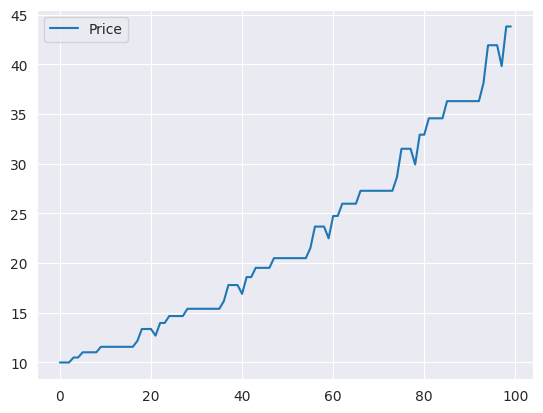

In [48]:
sns.set_style("darkgrid")
model_vars.plot();

It is observed that since savers are given a periodic behaviour of investing in the same position but with different frequencies then a trivial price trend pattern is a natural result in the direction of savers sentiment, which is a given model parameter.

### 3.2 Running Model with Savers and Random Traders

In [49]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.8
savers_sentiment = 0.70

model = Market_Model_2(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26
saver_10: 	 $ 944.09
saver_11: 	 $ 955.64
saver_12: 	 $ 901.3
saver_13: 	 $ 931.93
saver_14: 	 $ 968.05
saver_15: 	 $ 943.06
saver_16: 	 $ 967.32
saver_17: 	 $ 975.99
saver_18: 	 $ 1069.5
saver_19: 	 $ 952.9
saver_20: 	 $ 1045.95
saver_21: 	 $ 924.97
saver_22: 	 $ 975.71
saver_23: 	 $ 958.64
rnd_trader_0: 	 $ 409.48
rnd_trader_1: 	 $ 428.94
rnd_trader_2: 	 $ 406.19
rnd_trader_3: 	 $ 416.37
rnd_trader_4: 	 $ 363.67
rnd_trader_5: 	 $ 378.23


In [50]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

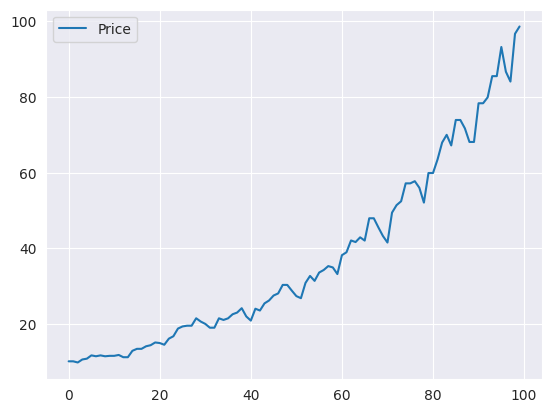

In [51]:
model_vars.plot();

In market with only savers and random traders one must pay attention to the amount of random traders and how much they can afford to exchange, this behaviour is controlled with self.order and p_savers.

Assuming that savers invest more than a random trader, which means that savers influence the price more (self.order for them is higher), it is observed that the price trend given by savers_sentiment persists but with some noise given by random tranders.

If self.order for savers is not high enough one observes that price trend is broken by random price oscillations and in some runs it may even invert the previous trend.

In [52]:
display(agent_vars)
agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_9       1040.260000      buy      0
     saver_2       1047.290000      buy      0
     rnd_trader_3   407.370000     sell      1
     saver_7       1020.400000      buy      0
     saver_3       1048.130000      buy      0
...                        ...      ...    ...
100  saver_19       427.993263     sell      0
     rnd_trader_0 -3142.759873      buy      1
     saver_4        582.769288      buy      0
     saver_0        562.212130      buy      0
     saver_16       493.071567      buy      0

[3000 rows x 3 columns]

### 3.3 Running Model with Savers, Random Traders and Followers

In [53]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.6
p_followers = 0.2
savers_sentiment = 0.70

model = Market_Model_3(N_agents, Price, p_savers, p_followers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26
saver_10: 	 $ 944.09
saver_11: 	 $ 955.64
saver_12: 	 $ 901.3
saver_13: 	 $ 931.93
saver_14: 	 $ 968.05
saver_15: 	 $ 943.06
saver_16: 	 $ 967.32
saver_17: 	 $ 975.99
follower_0: 	 $ 641.7	 close_thr: 11.0%
follower_1: 	 $ 636.86	 close_thr: 12.3%
follower_2: 	 $ 604.35	 close_thr: 14.7%
follower_3: 	 $ 585.42	 close_thr: 10.5%
follower_4: 	 $ 639.53	 close_thr: 11.2%
follower_5: 	 $ 643.4	 close_thr: 10.8%
rnd_trader_0: 	 $ 416.37
rnd_trader_1: 	 $ 363.67
rnd_trader_2: 	 $ 378.23
rnd_trader_3: 	 $ 383.15
rnd_trader_4: 	 $ 366.38
rnd_trader_5: 	 $ 378.62


In [54]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

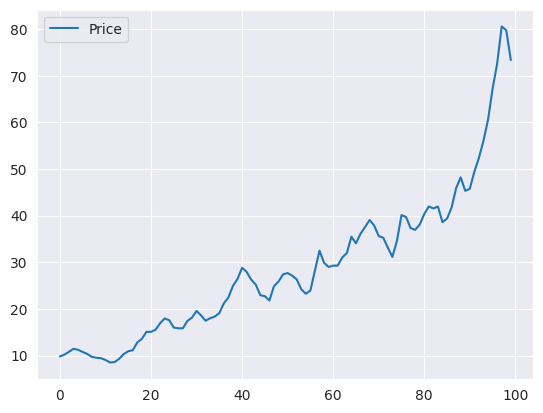

In [55]:
model_vars.plot();

In [56]:
display(agent_vars)
agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_3       1048.130000      buy      0
     saver_12       901.300000      buy      0
     saver_8        939.770000      buy      0
     saver_14       968.050000     sell      0
     follower_2     614.350000     null      0
...                        ...      ...    ...
100  follower_0    2070.301256     sell      1
     saver_9        866.040674      buy      0
     saver_13       757.710674     sell      0
     follower_3    2014.133458     sell      1
     rnd_trader_4 -2348.040551     sell      1

[3000 rows x 3 columns]

### 3.4 Running Model with Savers, Random Traders, Followers and Whales

In [57]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.05
savers_sentiment = 0.60

model = Market_Model_4(N_agents, Price, p_savers, p_followers, p_whales, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10
rnd_trader_0: 	 $ 386.93
rnd_trader_1: 	 $ 367.42
rnd_trader_2: 	 $ 367.74
rnd_trader_3: 	 $ 427.8
rnd_trader_4: 	 $ 408.3
rnd_trader_5: 	 $ 424.57
rnd_trader_6: 	 $ 418.38
rnd_trader_7: 	 $ 402.9
rnd_trader_8: 	 $ 437.85
rnd_trader_9: 	 $ 390.28
rnd_trader_10: 	 $ 404.16
rnd_trader_11: 	 $ 426.35
rnd_trader_12: 	 $ 409.48
rnd_trader_13: 	 $ 428.94
rnd_trader_14: 	 $ 406.19
rnd_trader_15: 	 $ 416.37
rnd_trader_16: 	 $ 363.67
rnd_trader_17: 	 $ 378.23
rnd_trader_18: 	 $ 383.15
rnd_trader_19: 	 $ 366.38
rnd_trader_20: 	 $ 378.62
rnd_trader_21: 	 $ 368.08
rnd_trader_22: 	 

In [58]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

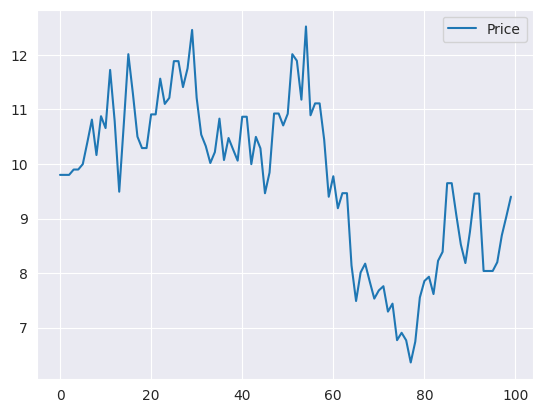

In [59]:
model_vars.plot();

In [60]:
model_vars.to_csv('../data/model_vars.csv')

In a market simulation, if the main objective is to observe a pretty realistic chart, then one should keep high the percentage of random traders.

Instead if one wants to capture the noiseless trend given by savers, followers and whales effects on price dynamics the percentage of random traders should be kept small.

## 4. Batch-Run

In [61]:
import numpy as np

In [62]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.05
savers_sentiment = 0.60

prm_grid = {
    'N_agents': N_agents,
    'Price': Price,
    'p_savers': p_savers,
    'p_followers': p_followers,
    'p_whales': p_whales,
    'savers_sentiment': np.arange(0.20, 1.00, 0.10)
}

In [63]:
results = mesa.batch_run(
    Market_Model_4,
    parameters=prm_grid,
    iterations=100,
    max_steps=200,
    number_processes=1,
    data_collection_period=1,
    display_progress=False
)

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10
rnd_trader_0: 	 $ 386.93
rnd_trader_1: 	 $ 367.42
rnd_trader_2: 	 $ 367.74
rnd_trader_3: 	 $ 427.8
rnd_trader_4: 	 $ 408.3
rnd_trader_5: 	 $ 424.57
rnd_trader_6: 	 $ 418.38
rnd_trader_7: 	 $ 402.9
rnd_trader_8: 	 $ 437.85
rnd_trader_9: 	 $ 390.28
rnd_trader_10: 	 $ 404.16
rnd_trader_11: 	 $ 426.35
rnd_trader_12: 	 $ 409.48
rnd_trader_13: 	 $ 428.94
rnd_trader_14: 	 $ 406.19
rnd_trader_15: 	 $ 416.37
rnd_trader_16: 	 $ 363.67
rnd_trader_17: 	 $ 378.23
rnd_trader_18: 	 $ 383.15
rnd_trader_19: 	 $ 366.38
rnd_trader_20: 	 $ 378.62
rnd_trader_21: 	 $ 368.08
rnd_trader_22: 	 

In [64]:
results_df = pd.DataFrame(results)
display(results_df)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,savers_sentiment,AgentID,Wealth,Position,Order
0,0,0,0,40,9.800000,0.2,0.1,0.05,0.2,NaN,NaN,NaN,NaN
1,0,0,1,40,8.428000,0.2,0.1,0.05,0.2,whale_1,9321.559484,sell,1.0
2,0,0,1,40,8.428000,0.2,0.1,0.05,0.2,rnd_trader_3,419.399484,sell,1.0
3,0,0,1,40,8.428000,0.2,0.1,0.05,0.2,saver_4,917.390000,sell,0.0
4,0,0,1,40,8.428000,0.2,0.1,0.05,0.2,follower_2,620.710000,null,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400795,799,99,200,40,9974.783495,0.2,0.1,0.05,0.9,rnd_trader_12,-1270.623225,sell,1.0
6400796,799,99,200,40,9974.783495,0.2,0.1,0.05,0.9,rnd_trader_23,-1269.253225,sell,1.0
6400797,799,99,200,40,9974.783495,0.2,0.1,0.05,0.9,rnd_trader_4,-1271.803225,buy,1.0
6400798,799,99,200,40,9974.783495,0.2,0.1,0.05,0.9,rnd_trader_5,-1255.533225,buy,1.0


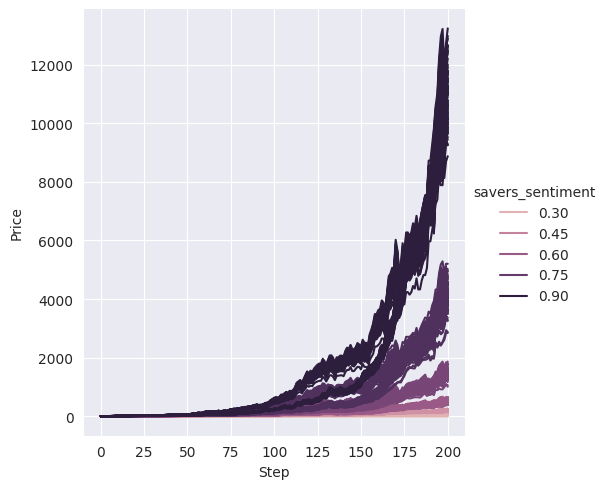

In [65]:
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment',
    units = 'iteration', estimator = None
)

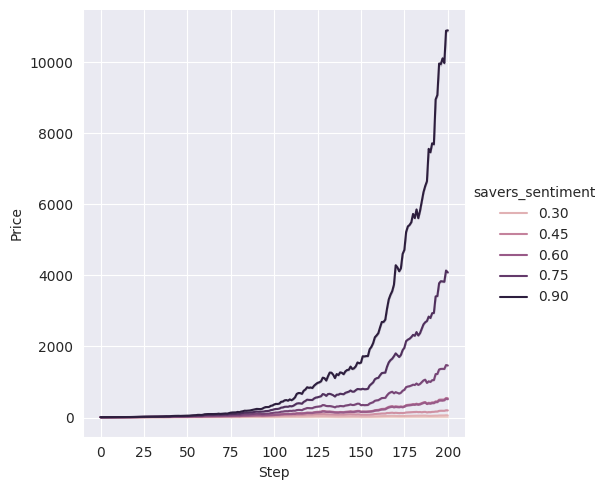

In [66]:
# this is a plot with mean values for each model parameter, with 95% confidence interval error band
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment'
)

In [37]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[1]]

In [38]:
display(_)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,savers_sentiment,AgentID,Wealth,Position,Order
8001,1,0,0,40,9.980000,0.2,0.1,0.05,0.3,NaN,NaN,NaN,NaN
8002,1,0,1,40,9.860240,0.2,0.1,0.05,0.3,whale_1,9320.967714,sell,1.0
8003,1,0,1,40,9.860240,0.2,0.1,0.05,0.3,rnd_trader_3,418.807714,sell,1.0
8004,1,0,1,40,9.860240,0.2,0.1,0.05,0.3,saver_4,917.390000,sell,0.0
8005,1,0,1,40,9.860240,0.2,0.1,0.05,0.3,follower_2,620.710000,null,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352789,793,99,200,40,12.382931,0.2,0.1,0.05,0.3,rnd_trader_12,-1388.977140,buy,1.0
6352790,793,99,200,40,12.382931,0.2,0.1,0.05,0.3,rnd_trader_23,-1387.607140,buy,1.0
6352791,793,99,200,40,12.382931,0.2,0.1,0.05,0.3,rnd_trader_4,-1390.157140,sell,1.0
6352792,793,99,200,40,12.382931,0.2,0.1,0.05,0.3,rnd_trader_5,-1373.887140,sell,1.0


In [39]:
# But we are interested in a mean + std dev plot

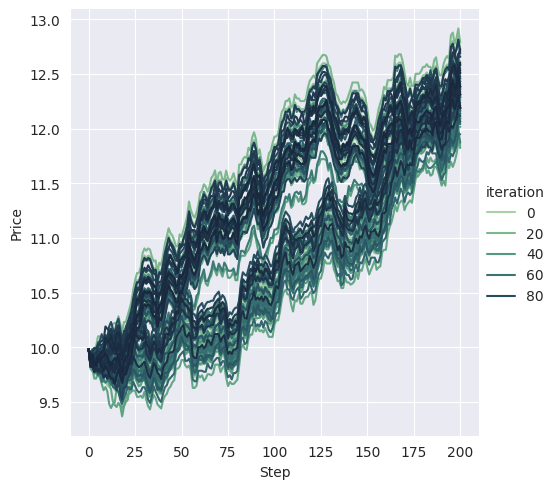

In [40]:
# Take a look at all runs for a given DOF, in this case for a given value of savers_sentiment
sns.relplot(
    data = _, kind = "line",
    x = "Step", y = "Price", hue = 'iteration', palette="ch:r=-.5,l=.75",
    estimator = None
)

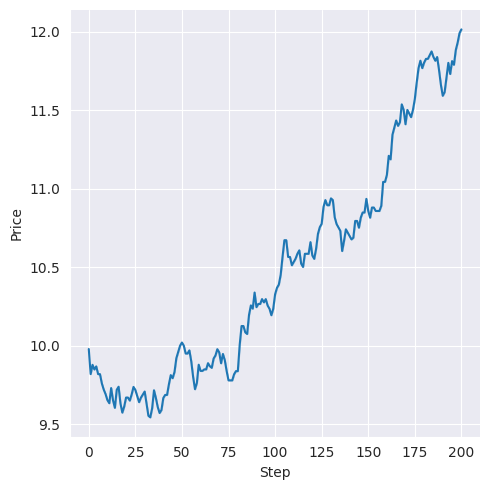

In [41]:
sns.relplot(
    data = _[ _['iteration'] == 5], kind="line",
    x="Step", y="Price",
)

In [42]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[2]]

it = _['iteration'].unique().tolist()
it.pop(0)

_df = _[ _['iteration'] == 0].drop(columns = ['iteration'])
arr = np.arange(0, len(_df.dropna()), N_agents)
array_Price_values = _df.dropna().take(arr).Price.values

array_Step_values = _df.dropna().take(arr).Step.values

for el in it:
    
    _df = _[ _['iteration'] == el].drop(columns = ['iteration'])
    arr = np.arange(0, len(_df.dropna()), N_agents)
    array_Price_values_new = _df.dropna().take(arr).Price.values
    
    array_Price_values = np.vstack((array_Price_values, array_Price_values_new))

In [43]:
mean_Price_values = np.mean(array_Price_values, axis = 0)
std_Price_values = np.std(array_Price_values, axis = 0)

<Figure size 640x480 with 0 Axes>

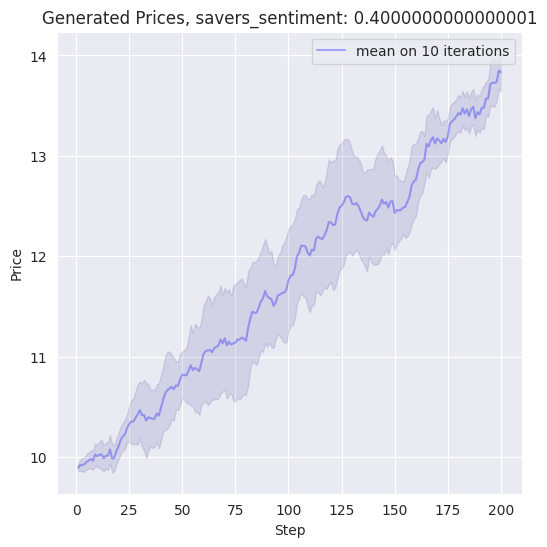

In [44]:
plt.figure()

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(array_Step_values, mean_Price_values, alpha=.3, label= 'mean on 10 iterations', color='blue')
ax.set(title = 'Generated Prices, savers_sentiment: {}'.format(results_df['savers_sentiment'].unique()[2]),
            xlabel = 'Step', ylabel = 'Price')
ax.fill_between(
    array_Step_values,
    mean_Price_values - std_Price_values,
    mean_Price_values + std_Price_values,
    alpha=0.1,
    color="navy",
    lw=1,
)

plt.legend()
plt.show();